<a href="https://colab.research.google.com/github/sumukhbhat12/Neural-Network-From-Scratch-MNIST-Dataset/blob/main/Neural_Network_From_Scratch_for_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST Dataset: https://www.kaggle.com/datasets/oddrationale/mnist-in-csv


The mnist_train.csv file contains the 60,000 training examples and labels. The mnist_test.csv contains 10,000 test examples and labels. Each row consists of 785 values: the first value is the label (a number from 0 to 9) and the remaining 784 values are the pixel values (a number from 0 to 255).

In [490]:
import numpy as np
import pandas as pd

mnist_train.csv takes a long time to upload

In [491]:
train = pd.read_csv('/content/mnist_train.csv')
test = pd.read_csv('/content/mnist_test.csv')

In [492]:
print(train.head())
print(test.head())

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]
   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      7    0    0    0    0    0    0    0    0    0  ...      0      0   
1      

convert dataframe into numpy array because numpy array is easier to work with for linear algebra

In [493]:
train = np.array(train)

print(train[:10])

[[5 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 ...
 [3 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]]


In [494]:
test = np.array(test)

print(test)

[[7 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]]


In [495]:
m,n = train.shape
print(m,n)

60000 785


transpose the numpy dataset, now the rows represent 784 pixels and 1 output and columns represent individual examples

In [496]:
train = train.T
print(train.shape)

(785, 60000)


In [497]:
test = test.T
print(test.shape)

(785, 10000)


extract the features (pixels) and the output

In [498]:
X_train = train[1:]
y_train = train[0]

In [499]:
X_test = test[1:]
y_test = test[0]

In [500]:
print(X_train.shape, X_test.shape)

(784, 60000) (784, 10000)


Normalize the dataset

In [501]:
X_train = X_train / 255
X_test = X_test / 255

#Neural Network

initialize parameters - weights and biases

In [502]:
def initialize_params():
  # #W1 is weights of input layer and the shape is 10x784 because there are 10 nodes in the hidden layer
  # W1 = np.random.rand(10, 784) - 0.5

  # #b1 is the bias of input layer
  # b1 = np.random.rand(10, 1) - 0.5

  # #W2 is weights of hidden layer and the shape is 10x10 because there are 10 nodes in the output layer
  # W2 = np.random.rand(10, 10) - 0.5

  # b2 = np.random.rand(10, 1) - 0.5

  #Below weights give better accuracy
  W1 = np.random.normal(size=(10,784)) * np.sqrt(1.0/784)

  b1 = np.random.normal(size=(10,1)) * np.sqrt(1.0/10)

  W2 = np.random.normal(size=(10,10)) * np.sqrt(1.0/20)

  b2 = np.random.normal(size=(10,1)) * np.sqrt(1.0/10)

  return W1, b1, W2, b2

ReLu activation function


f(x) = max(0, x)

In [503]:
def relu(Z):
  return np.maximum(0, Z)

Softmax function to convert the output into probability distribution


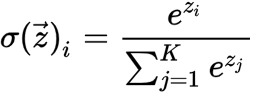

In [504]:
def softmax(Z):
  # return np.exp(Z) / np.sum(np.exp(Z))  #collapses the rows to 1 row to calculate
  #above causes overflow so below is equivalent of the above
  exp = np.exp(Z - np.max(Z))
  return exp / exp.sum(axis=0)

Forward Propagation

In [505]:
def forward_prop(W1, b1, W2, b2, X_train):
  #X_train -> 784xm
  Z1 = W1.dot(X_train) + b1  #W1 -> 10x784, Z1 -> 10xm

  #A1 is the activated output of input layer which is fed as input to hidden layer
  A1 = relu(Z1)   #A1 -> 10xm
  Z2 = W2.dot(A1) + b2    #W2 -> 10x10, Z2 -> 10xm

  #A2 is the output in terms of probability distribution
  A2 = softmax(Z2)    #A2 -> 10xm

  return Z1, A1, Z2, A2

In [506]:
y_train.size

60000

One Hot Encoding

[2,1,3] -> [[0,0,1,0], [0,1,0,0], [0,0,0,1]]

y[[0,1,2,3], [3,2,0,1]] = 1  -->  y[0,3] = 1, y[1,2] = 1, y[2,0] = 1 ...

In [507]:
def one_hot_encode(y_train):
  y = np.zeros((y_train.size, y_train.max() + 1)) #here 9 is max hence 60k arrays of 10 zeros will be returned
  y[np.arange(y_train.size), y_train] = 1
  y = y.T   #convert from m x 10 to 10 x m
  return y

derivative of ReLu activation function

relu(z) is z if z > 0, 0 otherwise

taking derivative of z we get 1 and derivative of 0 we get 0

In [508]:
def derivative_relu(Z):
  return Z > 0

backpropagation

m is 60k here

In [509]:
def back_prop(Z1, A1, Z2, A2, W2, X_train, y_train):
  y = one_hot_encode(y_train)

  #dZ2 is the error = predicted - actual
  dZ2 = 2*(A2 - y)    #dZ2 -> 10xm

  dW2 = 1/m * dZ2.dot(A1.T)   #A1 -> 10xm, dW2 -> 10x10

  db2 = 1/m * np.sum(dZ2, axis=1).reshape(-1,1)   #db2 -> 10x1

  dZ1 = W2.T.dot(dZ2) * derivative_relu(Z1)   #W2 -> 10x10, dZ2 -> 10xm, Z1 -> 10xm, dZ1 -> 10xm

  dW1 = 1/m * dZ1.dot(X_train.T)   #dZ1 -> 10xm, A0 -> 784xm, dW1 -> 10x784

  db1 = 1/m * np.sum(dZ1, axis=1).reshape(-1,1)   #dZ1 -> 10xm, db1 -> 10x1

  return dW1, db1, dW2, db2

update the weights and the biases

In [510]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
  W1 = W1 - alpha * dW1
  b1 = b1 - alpha * db1
  W2 = W2 - alpha * dW2
  b2 = b2 - alpha * db2
  return W1, b1, W2, b2

In [511]:
def get_predictions(A2):
  return np.argmax(A2, 0)

In [512]:
def get_accuracy(predictions, y_train):
  return np.sum(predictions == y_train) / y_train.size

Gradient Descent

In [513]:
def gradient_descent(X_train, y_train, iter, alpha):
  W1, b1, W2, b2 = initialize_params()

  y_train_int = y_train.astype(int)   #the elements of the X_train and y_train are in float

  for i in range(iter):
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X_train)

    dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X_train, y_train_int)

    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

    if (i % 100 == 0):
      print("Iteration ", i)
      print("Accuracy : ", get_accuracy(get_predictions(A2), y_train))

  print("Final Accuracy : ", get_accuracy(get_predictions(A2), y_train))
  return W1, b1, W2, b2

we get 93.6% accuracy (on training dataset) if trained for 1000 iterations, and ~88% if trained for 100 iterations

In [514]:
W1, b1, W2, b2 = gradient_descent(X_train, y_train, 100, 0.25)

Iteration  0
Accuracy :  0.12508333333333332
Iteration  100
Accuracy :  0.85395
Iteration  200
Accuracy :  0.8979166666666667
Iteration  300
Accuracy :  0.9137833333333333
Iteration  400
Accuracy :  0.9216166666666666
Iteration  500
Accuracy :  0.92655
Iteration  600
Accuracy :  0.9274833333333333
Iteration  700
Accuracy :  0.93135
Iteration  800
Accuracy :  0.9335666666666667
Iteration  900
Accuracy :  0.9343666666666667
Final Accuracy :  0.9362833333333334


In [518]:
def make_predictions(X, W1, b1, W2, b2):
  _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)

  predictions = get_predictions(A2)
  return predictions

In [515]:
import matplotlib.pyplot as plt

In [516]:
def test_prediction(index, W1, b1, W2, b2):
  current_image = X_train[:, index, None]   #rows represent features and columns represent examples

  prediction = make_predictions(current_image, W1, b1, W2, b2)
  label = y_train[index]

  print("Prediction : ", prediction)
  print("label : ", label)

  current_image = current_image.reshape((28,28)) * 255    #because we normalized it at the start by dividing by 255

  plt.gray()
  plt.imshow(current_image, interpolation='nearest')
  plt.show()

Prediction :  [2]
label :  2


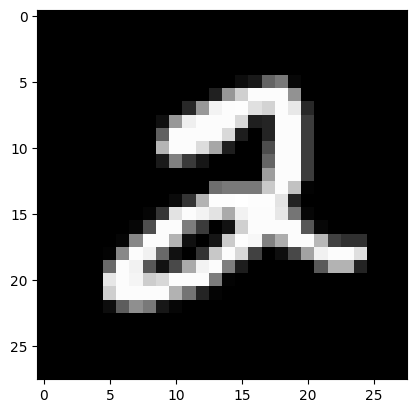

In [519]:
test_prediction(5, W1, b1, W2, b2)

Prediction :  [5]
label :  5


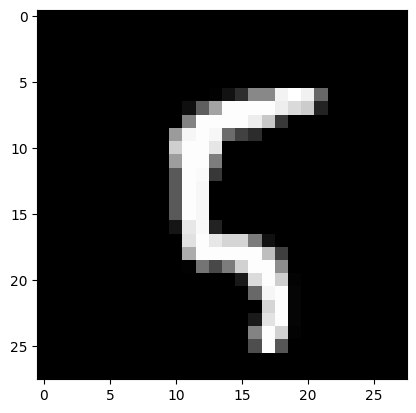

In [520]:
test_prediction(100, W1, b1, W2, b2)

In [521]:
X_train.shape

(784, 60000)

Prediction :  [8]
label :  8


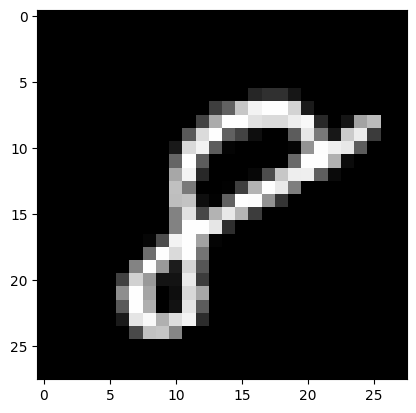

In [523]:
test_prediction(59999, W1, b1, W2, b2)

Accuracy for Test Dataset

In [524]:
test_pred = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(test_pred, y_test)

0.9308